In [45]:
import pandas as pd

In [46]:


binning= pd.read_table("../DiarrheaExample/SRS1992958/Corrected_bins/binning_no_multiedges.tsv", index_col=0,header=None)
binning.columns= ["Bin"]

binning.head()

,Bin
0,
NODE_1_length_426476_cov_20.919868,SRS1992958_vamb_370
NODE_2_length_382687_cov_21.297419,SRS1992958_vamb_370
NODE_3_length_335529_cov_199.766027,SRS1992958_vamb_615
NODE_4_length_313833_cov_39.907030,SRS1992958_vamb_2394
NODE_5_length_246210_cov_27.986541,SRS1992958_vamb_370


In [47]:
# Find nodes with multiple assingments

multiple_assignments= []

with open("../DiarrheaExample/SRS1992958/Corrected_bins/binning.tsv") as f:
    for line in f:
        elements= line.split("\t")
        if len(elements) > 2:
            multiple_assignments.append(elements[0])

print(f"Found {len(multiple_assignments)} nodes with multiple assignments")


binning.loc[multiple_assignments,"Bin"]= "multiple"

Found 219 nodes with multiple assignments


In [48]:
# colors

scafold_colors= pd.Series(index=['SRS1992958_vamb_370', 'SRS1992958_vamb_615',
       'SRS1992958_vamb_2394', 'SRS1992958_vamb_664',
       'SRS1992958_vamb_1046', 'SRS1992958_vamb_18', 'SRS1992958_vamb_20',"multiple"],
       data=['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0',"darkblue"],
       name="Color")
#.fillna("grey")

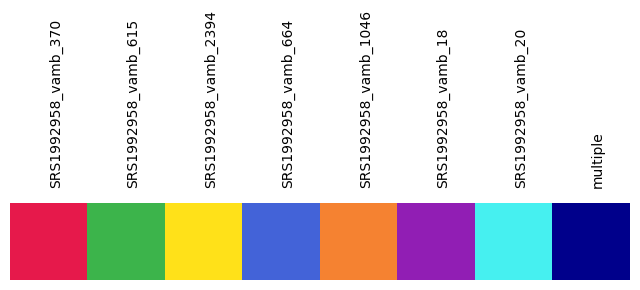

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.palplot(scafold_colors)

ax=plt.gca()


for i, name in enumerate(scafold_colors.index):
    ax.text(i, -0.7, name,rotation=90,ha="left",va="bottom")

ax.set_axis_off()

plt.savefig("../Tutorial/images/Graph_legend.png",dpi=300,bbox_inches="tight")

In [49]:
# map nodes to scaffolds
scafold="undefined"

node_mapping= {}
with open("../DiarrheaExample/SRS1992958/assembly/scaffolds.paths") as f:
    for line in f:
        if line.startswith("NODE"):
            scafold=line.strip().strip("'")
        else:
            nodes=line.strip().strip(";").replace("+","").replace("-","").split(",")

            for n in nodes:
                node_mapping[n]=scafold
            

node_info= pd.Series(node_mapping).to_frame()
node_info.columns=["Scaffold"]



In [50]:

node_info= node_info.join(binning, on="Scaffold").join(scafold_colors,on="Bin").fillna("grey")

In [42]:
node_info.to_csv("../DiarrheaExample/SRS1992958/Corrected_bins/node_info.csv")

In [43]:
scafold_info.query("Name=='SRS1992958_88'").head()

,Scaffold,Name,Bin,Color
68250,NODE_89_length_46282_cov_7863.197006,SRS1992958_88,SRS1992958_vamb_370,#e6194b


In [44]:
",".join(node_info.query("Bin=='SRS1992958_vamb_615'").index)

'9018,163172,1807187,28529,180558,3943513,2466253,353108,1202416,21725,179942,11776,847730,30787,21273,70822,25947,820400,3896479,786810,32149,1287056,27013,31399,23653,28835,19677,4010918,2306881,2254633,2452143,22915,30459,27457,17852,531500,9956,576045,2496227,3574768,2970549,246147,5015,973771,3839918,37610,92807,23013,23527,124358,41216,18465,5666,3891416,23195,3497998,3970398,3928720,113969,33285,4000289,21013,3461820,30983,3252,1361797,3250,8251,8253,32683,29767,3561237,30855,4025437,13047,3066888,780610,3951965,1291315,27005,17153,5047,31071,22065,3727295,2394033,3640337,4019395,3992120,2242411,13203,4010368,7522,30233,20425,1070,2435574,2448919,2448921,19773,28083,19131,31053,3987795,3704986,1742854,3891370,11746,5201,14801,22809,1729805,1152449,33277,14239,1281900,16583,3772080,1285160,3996615,32013,17137,5730,19371,4000749,182474,182472,3947941,70880,181202,181196,2937235,3990511,70694,70688,67100,22173,2932228,2511150,3880720,23831,3922843,58633,12361,3984809,65462,179534,1

Workflow with


Install Bandage https://rrwick.github.io/Bandage/

Bandage is a GUI software to visualize assembly graphs. 


Load the graph in `SRS1992958/assembly/`

Click on draw graph.
Color nodes by depth.


Do you see some exeptional nodes?

Answer: Circular nodes.

Click on them, and chack the coverage information. 



I prepared a mapping file from graph nodes to contigs to the binds.
Import node info

Click on open CSV and choose the file `SRS1992958/assembly/Node_info.csv`


The coloring should change according to the bins. 

Deactivate any node labeling (There are too many labels).


Does the colorig make sense? 
What about the purple nodes?
What are the colors of the circular nodes?


What is the Contig name of the most abundant circular node?

Answer: SRS1992958_88


Let's see what it is?

`filterbyname.sh in="SRS1992958_contigs.fasta" names=SRS1992958_88 out=SRS1992958_88.fasta ow include`

This creates a fasta file with only this node. 

`sendsketch.sh in="SRS1992958_88.fasta"`

Check also the annotation of the corresponding bin with sendsketch.



Move all the contigs belongint to a bin:


9018,163172,1807187,28529,180558,3943513,2466253,353108,1202416,21725,179942,11776,847730,30787,21273,70822,25947,820400,3896479,786810,32149,1287056,27013,31399,23653,28835,19677,4010918,2306881,2254633,2452143,22915,30459,27457,17852,531500,9956,576045,2496227,3574768,2970549,5015,70538,37610,92807,23013,23527,124358,41216,18465,5666,3891416,23195,3497998,3970398,3928720,113969,33285,4000289,21013,3461820,30983,3252,1361797,3250,716456,8251,8253,32683,29767,30855,4025437,13047,3066888,780610,3951965,1291315,27005,17153,5047,31071,22065,3727295,2394033,3699595,68596,3640337,4019395,3992120,2242411,13203,4010368,7522,30233,20425,1070,2435574,2448919,2448921,19773,28083,19131,31053,3987795,3704986,1742854,11746,5201,14801,22809,1729805,1152449,33277,14239,1281900,16583,3772080,1285160,3996615,32013,17137,3874787,5730,19371,4000749,182474,182472,3947941,70880,181202,181196,2937235,3990511,67100,22173,2932228,2511150,23831,3922843,12361,3984809,179534,13691,179556,1288619,8842,3984811,4020819,28577,8844,181388,17161,181386,23589,4016747,55949,3990359,30661,70354,19134,32659,3402159,19785,3999602,30645,7082,3980083,29283,25809,22083,29969,31679,3879264,1290053,158416,158410,32625,3979844,29747,16769,28007,3355867,3956047,181576,181574,181578,3978088,2788,59147,23873,3950275,13093,15597,3973264,3680672,46133,915371,6081,32543,17541,1284110,1874811,2662859,119575,21537,11861,23695,3985721,23697,2624622,160943,67818,67820,19199,25397,2270,6262,23191,169260,169254,22029,67186,67192,33329,1668,18937,31825,2171921,3546367,14799,1288625,20185,3536477,13143,3689154,13041,22683,580999,33265,20565,31659,4932,14291,20583,86184,15917,3210385,12989,2834,575,11328,20715,3162007,29219,4009424,1293541,183863,840295,10844,3462058,30133,32285,32247,19499,32317,20977,70494,12833,3961032,68208,68206,107764,346233,32767,29101,3448148,517626,21177,179682,1249,23587,1957069,2294381,18847



